# Decision Trees

on the Titanic dataset

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

%matplotlib inline

### Preparations

In [56]:
df = pd.read_csv('data/titanic/train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1. Inspect the size of the dataset

In [57]:
df.shape

(891, 12)

#### 2. Select the Survived column to use as target

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [60]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Feature engineering 
starts here. X_fe is prpared and has to be repeated for test.csv to predict y for submission to Kaggle

#### 3. Select columns to use as input features
Hereto, return to Titanic.ipynb to find the most influental columns:
- Pclass
- Sex
- Age
- Fare
- Embarked

To start with use just Pclass and sex

## Train test split the data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Feature engineering:
- convert male, female to 0, 1
- fill NaNs 
- scale Age
- scale Pclass
- scale Fares

In [62]:
one_hot_encoder = OneHotEncoder(drop='first') #convert male, female to 0,1

In [63]:
one_hot_encoder.fit(X_train[['Sex']])

OneHotEncoder(drop='first')

In [64]:
# When we use the .transform() the one_hot_encoder will apply the mapping that it learnt during fit to the 
# pd.Series that we pass it
pd.DataFrame(one_hot_encoder.transform(X_train[['Sex']]).todense(), columns = ['Sex'])
None

In [65]:
pipeline = Pipeline ([
                        ('impute', SimpleImputer(strategy='median')),
                        ('scale', MinMaxScaler())

])

In [66]:
pipeline.fit_transform(X_train[['Age']])

array([[0.34656949],
       [0.30887158],
       [0.2963056 ],
       [0.27117366],
       [0.00628299],
       [0.2963056 ],
       [0.32143755],
       [0.42196532],
       [0.25860769],
       [0.34656949],
       [0.34656949],
       [0.34656949],
       [0.27117366],
       [0.77381252],
       [0.22090978],
       [0.52249309],
       [0.71098266],
       [0.23347575],
       [0.52249309],
       [0.34656949],
       [0.24604172],
       [0.4282483 ],
       [0.34656949],
       [0.34656949],
       [0.28373963],
       [0.27117366],
       [0.6481528 ],
       [0.37170143],
       [0.45338025],
       [0.34656949],
       [0.27117366],
       [0.62302086],
       [0.33400352],
       [0.27117366],
       [0.63558683],
       [0.44709726],
       [0.35913546],
       [0.27117366],
       [0.62302086],
       [0.49736115],
       [0.33400352],
       [0.34656949],
       [0.81151043],
       [0.2083438 ],
       [0.34656949],
       [0.04498618],
       [0.34656949],
       [0.007

In [67]:
pipeline2 = Pipeline ([
                        ('impute', SimpleImputer(strategy='constant')),
                        ('encode', OneHotEncoder(drop='first'))

])

In [68]:
pipeline2.fit_transform(X_train[['Embarked']]).todense()

matrix([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [72]:
c_transformer = ColumnTransformer([
    ('impute and scale Pclass', pipeline, ['Pclass']),
    ('onehot', one_hot_encoder, ['Sex']),
    ('impute and scale age', pipeline, ['Age']),
    ('impute and scale fare', pipeline, ['Fare']),
    ('encode', pipeline2, ['Embarked'])
     ])

In [73]:
c_transformer.fit(X_train)

ColumnTransformer(transformers=[('impute and scale Pclass',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', MinMaxScaler())]),
                                 ['Pclass']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Sex']),
                                ('impute and scale age',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', MinMaxScaler())]),
                                 ['Age']),
                                ('impute and scale fare',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                              

In [74]:
X_train_fe = pd.DataFrame(c_transformer.transform(X_train), columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked1', 'Embarked2', 'Embarked3'])

## Find the optimal separation with Scikit

#### 7. Train the model

In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [76]:
m = DecisionTreeClassifier(max_depth=3)  # we allow that many questions
m.fit(X_train_fe, y_train)

DecisionTreeClassifier(max_depth=3)

#### 8. Make predictions

Prepare X_test_fe from X_test via feature engineering

In [77]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [78]:
X_test_fe = pd.DataFrame(c_transformer.transform(X_test), columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked1', 'Embarked2', 'Embarked3'])

In [79]:
X_test_fe.head()

,Pclass,Sex,Age,Fare,Embarked1,Embarked2,Embarked3
0,1.0,1.0,0.346569,0.029758,0.0,0.0,0.0
1,0.5,1.0,0.384267,0.020495,0.0,1.0,0.0
2,1.0,1.0,0.246042,0.015469,0.0,1.0,0.0
3,0.5,0.0,0.070118,0.064412,0.0,1.0,0.0
4,1.0,0.0,0.170646,0.021942,0.0,0.0,0.0


In [80]:
ypred = m.predict(X_test_fe)

#### 9. Calculate the accuracy

In [81]:
accuracy_score(y_test, ypred) #use sklearn's predictions

0.8026905829596412

## Plot the tree

#### 10. Plot the tree with according labels

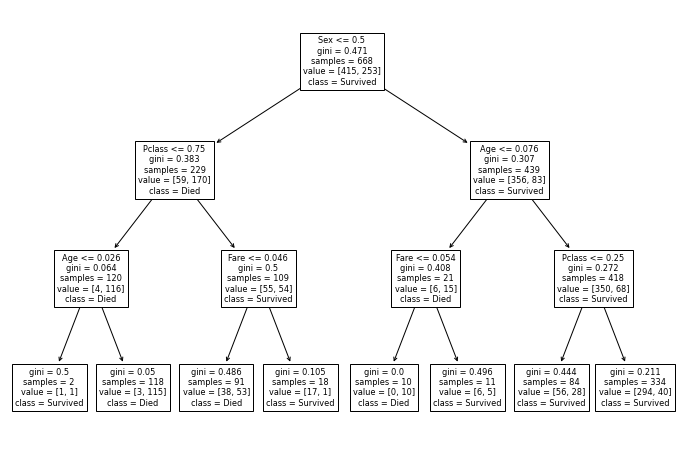

In [31]:
plt.figure(figsize=(12, 8))
t = plot_tree(m, feature_names=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked1', 'Embarked2', 'Embarked3'], class_names=['Survived', 'Died'])

# Predict test.csv for Titanic Kaggle challenge

In [85]:
df_test = pd.read_csv('data/titanic/test.csv', sep=',')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


df_test has no column ['Survived']

In [86]:
X_pred_test_fe = pd.DataFrame(c_transformer.transform(df_test), columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked1', 'Embarked2', 'Embarked3'])

In [87]:
X_pred_test_fe.head()

,Pclass,Sex,Age,Fare,Embarked1,Embarked2,Embarked3
0,1.0,1.0,0.428248,0.015282,1.0,0.0,0.0
1,1.0,0.0,0.585323,0.013663,0.0,1.0,0.0
2,0.5,1.0,0.773813,0.018909,1.0,0.0,0.0
3,1.0,1.0,0.334004,0.016908,0.0,1.0,0.0
4,1.0,0.0,0.271174,0.023984,0.0,1.0,0.0


In [88]:
ypred_test = m.predict(X_pred_test_fe)

In [89]:
submission = pd.DataFrame(ypred_test, index=df_test['PassengerId'], columns=['Survived'])
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [90]:
submission.to_csv('data/titanic/submission_m8.csv')